In [11]:
!pip install tabulate
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
insurance_data = pd.read_csv("insurance.csv")
total_insurance = len(insurance_data)
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 1. Analisa Descriptive Statistic

## This is the lesson_1 answer, consist
1. Berapa rata-rata nilai BMI yang merokok?
2. Berapa rata-rata umur pada data tersebut?
3. Apakah rata-rata umur perempuan dan laki-laki yang merokok sama?
4. BMI mana yang lebih tinggi, laki-laki atau perempuan?
5. BMI mana yang lebih tinggi, perokok atau non perokok?


In [ ]:
# 1. Berapa rata-rata nilai BMI yang merokok?

smoker_data = insurance_data[insurance_data["smoker"] == "yes"] # Filter only get insurance with smoker
smoker_data_bmi = smoker_data["bmi"].agg(np.mean)  # Agg the smoker bmi with mean from numpy
print(round(smoker_data_bmi, 2))

30.71


In [ ]:
# 2 Berapa rata-rata umur pada data tersebut?

age_data = insurance_data["age"].agg(np.mean)  # Agg the age using np.mean
print(round(age_data, 2))

39.21


In [ ]:
# 3. Apakah rata-rata umur perempuan dan laki-laki yang merokok sama?
smoker_age_data = smoker_data.groupby(["sex"])["age"].agg(np.mean)
print(round(smoker_age_data, 2))

sex
female    38.61
male      38.45
Name: age, dtype: float64


In [ ]:
# 4. BMI mana yang lebih tinggi, laki-laki atau perempuan?
bmi_gender_data = insurance_data.groupby(["sex"])["bmi"].agg(np.mean)
print(round(bmi_gender_data, 2))

sex
female    30.38
male      30.94
Name: bmi, dtype: float64


In [ ]:
# 5. BMI mana yang lebih tinggi, perokok atau non perokok?
bmi_smoker_data = insurance_data.groupby(["smoker"])["bmi"].agg(np.mean)
print(round(bmi_smoker_data, 2))

smoker
no     30.65
yes    30.71
Name: bmi, dtype: float64


# 2. Analisa Variabel Kategorik ( PMF )

## This is the lesson_2 answer, consist

1. Gender mana yang memiliki tagihan paling tinggi?
2. Distribusi peluang tagihan di tiap-tiap region?
3. Mana yang lebih tinggi proporsi perokok atau non perokok?
4. Berapa peluang seseorang tersebut adalah perempuan jika diketahui dia adalah perokok?
5. Berapa peluang seseorang tersebut adalah laki laki jika diketahui dia adalah perkokok?

sex
female    0.47
male      0.53
Name: charges, dtype: float64


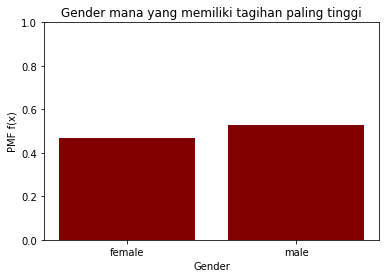

In [ ]:
# 1. Gender mana yang memiliki tagihan paling tinggi?
total_charges = insurance_data["charges"].sum()
gender_charges_pmf = insurance_data.groupby(["sex"])["charges"].agg(np.sum)
pmf = round(gender_charges_pmf / total_charges, 2)
print(pmf)

plt.bar(pmf.index, pmf.values, color ='maroon')
plt.xlabel("Gender")
plt.ylabel("PMF f(x)")
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Gender mana yang memiliki tagihan paling tinggi")
plt.show()

region
northeast    0.24
northwest    0.23
southeast    0.30
southwest    0.23
Name: charges, dtype: float64


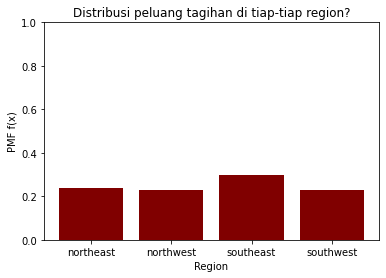

In [ ]:
# 2. Distribusi peluang tagihan di tiap-tiap region?
total_charges = insurance_data["charges"].sum()
region_charges_pmf = insurance_data.groupby(["region"])["charges"].agg(np.sum)
pmf = round(region_charges_pmf / total_charges, 2)
print(pmf)

plt.bar(pmf.index, pmf.values, color ='maroon')
plt.xlabel("Region")
plt.ylabel("PMF f(x)")
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Distribusi peluang tagihan di tiap-tiap region?")
plt.show()

smoker
no     0.8
yes    0.2
dtype: float64


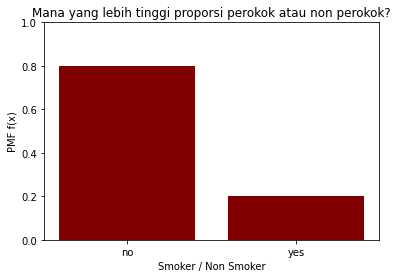

In [ ]:
# 3. Mana yang lebih tinggi proporsi perokok atau non perokok?
smoker_charges_pmf = insurance_data.groupby(["smoker"]).size()
pmf = round(smoker_charges_pmf / total_insurance, 2)
print(pmf)

plt.bar(pmf.index, pmf.values, color ='maroon')
plt.xlabel("Smoker / Non Smoker")
plt.ylabel("PMF f(x)")
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Mana yang lebih tinggi proporsi perokok atau non perokok?")
plt.show()

0.42


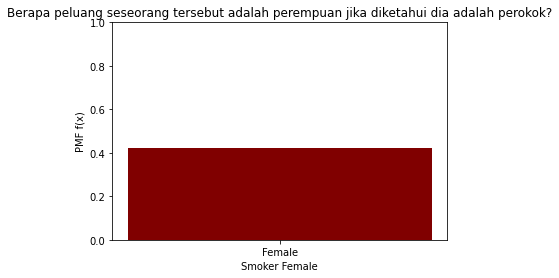

In [ ]:
# 4. Berapa peluang seseorang tersebut adalah perempuan jika diketahui dia adalah perokok?
smoker_proportion = len(insurance_data[insurance_data["smoker"] == "yes"]) 
female_smoker = len(insurance_data[(insurance_data["smoker"] == "yes") & (insurance_data["sex"] == "female")]) 

pmf_female_given_smoker = female_smoker / smoker_proportion
pmf = round(pmf_female_given_smoker, 2)
print(pmf)

plt.bar("Female", pmf, color ='maroon')
plt.xlabel("Smoker Female")
plt.ylabel("PMF f(x)")
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Berapa peluang seseorang tersebut adalah perempuan jika diketahui dia adalah perokok?")
plt.show()

In [ ]:
# 5. Berapa peluang seseorang tersebut adalah laki laki jika diketahui dia adalah perkokok?

0.58


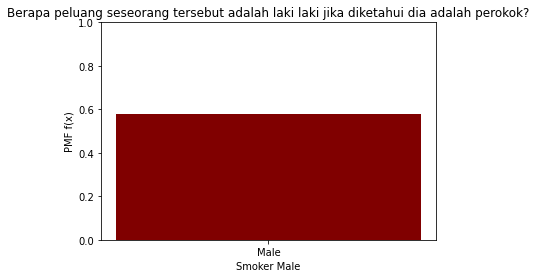

In [ ]:
smoker_proportion = len(insurance_data[insurance_data["smoker"] == "yes"]) 
male_smoker = len(insurance_data[(insurance_data["smoker"] == "yes") & (insurance_data["sex"] == "male")]) 

pmf_male_given_smoker = male_smoker / smoker_proportion
pmf = round(pmf_male_given_smoker, 2)
print(pmf)


plt.bar("Male", pmf, color ='maroon')
plt.xlabel("Smoker Male")
plt.ylabel("PMF f(x)")
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Berapa peluang seseorang tersebut adalah laki laki jika diketahui dia adalah perokok?")
plt.show()

# 3. Analisa Variabel Continue ( CDF )

## This is the lesson_3 answer, consist
1. Mencari Peluang besar tagihan berdasarkan BMI
2. Mencari kemungkinan terjadi seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan diatas 16.700
3. Berapa peluang seseorang acak tagihan kesehatannya diatas 16.700 diketahui dia adalah perokok
4. Mana lebih mungkin terjadi:

    a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.700, atau

    b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.700

5. Mana lebih mungkin terjadi:

    a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.700, atau

    b. Seseorang non perokok dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.700

0.8324


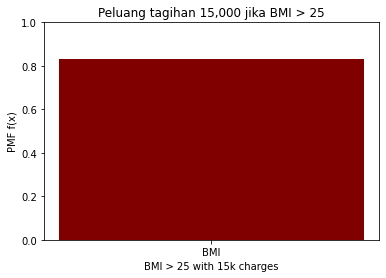

In [ ]:
# 1. Mencari Peluang besar tagihan berdasarkan BMI
# Peluang BMI > 25 jika tagihan 15,000
charges_over_15k = len(insurance_data[insurance_data["charges"] > 15000])
bmi_over_25_15k = len(insurance_data[(insurance_data["bmi"] > 25) & (insurance_data["charges"] > 15000)])
cdf = round(bmi_over_25_15k / charges_over_15k, 4)

print(cdf)

plt.bar("BMI", cdf, color ='maroon')
plt.xlabel("BMI > 25 with 15k charges")
plt.ylabel("PMF f(x)")
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Peluang tagihan 15,000 jika BMI > 25")
plt.show()

0.85


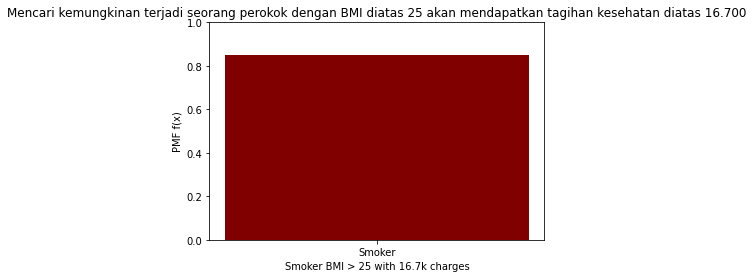

In [ ]:
# 2. Mencari kemungkinan terjadi seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan diatas 16.700
smoker_data = insurance_data[insurance_data["smoker"] == "yes"]
smoker_bmi_over_25 = len(smoker_data[(smoker_data["bmi"] > 25) & (smoker_data["charges"] > 16700)])
charges_over_16k = len(smoker_data[smoker_data["charges"] > 16700])

pmf = round(smoker_bmi_over_25 / charges_over_16k, 2)
print(pmf)

plt.bar("Smoker", pmf, color ='maroon')
plt.xlabel("Smoker BMI > 25 with 16.7k charges")
plt.ylabel("PMF f(x)")
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Mencari kemungkinan terjadi seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan diatas 16.700")
plt.show()

0.93


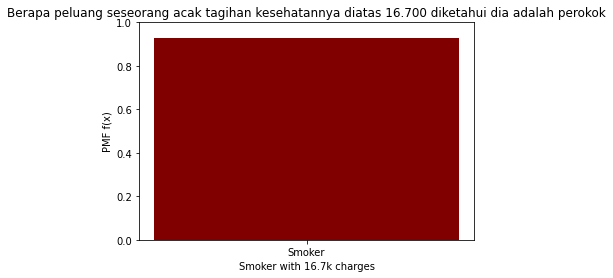

In [ ]:
# 3. Berapa peluang seseorang acak tagihan kesehatannya diatas 16.700 diketahui dia adalah perokok
smoker_charges_f = len(insurance_data[(insurance_data["smoker"] == "yes") & (insurance_data["charges"] > 16700)])
smoker_len = len(insurance_data[insurance_data["smoker"] == "yes"])

pmf = round(smoker_charges_f / smoker_len, 2)
print(pmf)

plt.bar("Smoker", pmf, color ='maroon')
plt.xlabel("Smoker with 16.7k charges")
plt.ylabel("PMF f(x)")
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Berapa peluang seseorang acak tagihan kesehatannya diatas 16.700 diketahui dia adalah perokok")
plt.show()

0.85
0.15


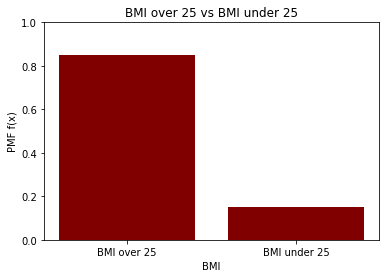

In [ ]:
# 4. Mana lebih mungkin terjadi
# Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.700, atau Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.700

charges_over_16k = len(insurance_data[insurance_data["charges"] > 16700])
bmi_over_25_16k = len(insurance_data[(insurance_data["bmi"] > 25) & (insurance_data["charges"] > 16700)])
bmi_under_25_16k = len(insurance_data[(insurance_data["bmi"] < 25) & (insurance_data["charges"] > 16700)])


over_25_pmf = round(bmi_over_25_16k / charges_over_16k, 2)
under_25_pmf = round(bmi_under_25_16k / charges_over_16k, 2)
print(over_25_pmf)
print(under_25_pmf)

pmf_table = pd.Series({"BMI over 25": over_25_pmf, "BMI under 25": under_25_pmf})

plt.bar(pmf_table.index, pmf_table.values, color ='maroon')
plt.xlabel("BMI")
plt.ylabel("PMF f(x)")
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("BMI over 25 vs BMI under 25")
plt.show()

0.76
0.24


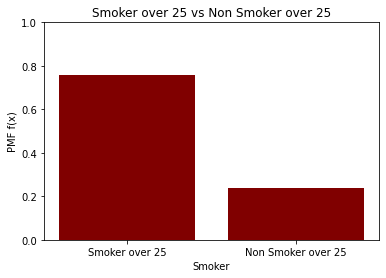

In [ ]:
# 5. Mana lebih mungkin terjadi:
# Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.700, 
# atau Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.700

smoker_bmi_over_25 = insurance_data[(insurance_data["bmi"] > 25) & (insurance_data["smoker"] == "yes")]
non_smoker_bmi_over_25 = insurance_data[(insurance_data["bmi"] > 25) & (insurance_data["smoker"] == "no")]
charges_bim_over_25_over_16k = len(insurance_data[(insurance_data["bmi"] > 25) & (insurance_data["charges"] > 16700)])

smoker_16k = len(smoker_bmi_over_25[smoker_bmi_over_25["charges"] > 16700])
non_smoker_16k = len(non_smoker_bmi_over_25[non_smoker_bmi_over_25["charges"] > 16700])


over_25_smoker_pmf = round(smoker_16k / charges_bim_over_25_over_16k, 2)
over_25_nonsmoker_pmf = round(non_smoker_16k / charges_bim_over_25_over_16k, 2)
print(over_25_smoker_pmf)
print(over_25_nonsmoker_pmf)

pmf_table = pd.Series({"Smoker over 25": over_25_smoker_pmf, "Non Smoker over 25": over_25_nonsmoker_pmf})

plt.bar(pmf_table.index, pmf_table.values, color ='maroon')
plt.xlabel("Smoker")
plt.ylabel("PMF f(x)")
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title("Smoker over 25 vs Non Smoker over 25")
plt.show()

# 4. Analisa Korelasi Variabel

Saya akan mengecheck korelasi antara BMI dari orang yang merokok dan Tagihan, untuk menunjukkan apakah memiliki korelasi positif atau negatif atau bahkan tidak berkorelasi sama sekali

Jika korelasinya positif dan mendekati 1, maka perokok yang memiliki BMI tinggi, berpeluang membayar tagihan yang sangat tinggi

In [4]:
smoker_data = insurance_data[insurance_data["smoker"] == "yes"]
bmi_charges_corr = np.corrcoef(x=smoker_data["bmi"], y=smoker_data["charges"])
bmi_charges_corr

array([[1.        , 0.80648061],
       [0.80648061, 1.        ]])

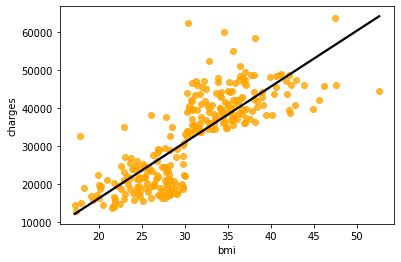

In [5]:
sns.regplot(x=smoker_data["bmi"],
            y=smoker_data["charges"], 
            data=smoker_data,
            ci=None,
            scatter_kws={"color": "orange"}, line_kws={"color": "black"});
plt.show()

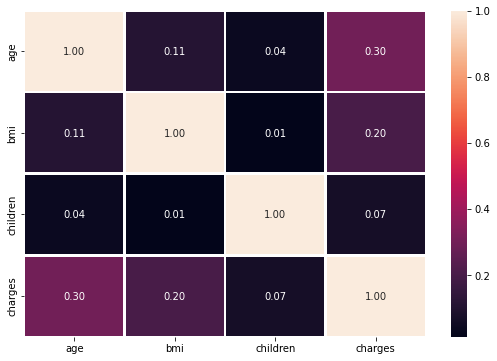

In [8]:
all_corr = insurance_data.corr()
f,ax = plt.subplots(figsize=(9, 6))
sns.heatmap(all_corr, annot=True, fmt=".2f", ax=ax, linewidth=1.5)
plt.show()

# 5. Hipotesis Testing


1. Tagihan Kesehatan perokok lebih tinggi dibandingkan tagihan kesehatan non-perokok
2. Tagihan kesehatan orang dengan BMI > 25 lebih tinggi dibandingkan orang dengan BMI < 25
3. BMI laki laki dan perempuan sama

In [34]:
# 1. Tagihan Kesehatan perokok lebih tinggi dibandingkan tagihan kesehatan non-perokok

# karna hipotesis sekarang adalah perokok memiliki tagihan lebih tinggi dibandingkan non perokok
# kita akan membuktikan bahwa apakah tagihan perokok ternyata lebih rendah dibandingkan non perokok
# Kita akan menggunakan 95% confidence level yanga artinya alphanya 5%

# H0: Tagihan perokok > Tagihan non perokok
# HA: Tagihan perokok < Tagihan non perokok

# Low tailed test / uji pihak kiri
# Jika p-value tagihan perokok lebih kecil dibanding alpha, maka kita bisa menolak hipotesis awal / H0

smoker = insurance_data[insurance_data["smoker"] == "yes"]
nonsmoker = insurance_data[insurance_data["smoker"] == "no"]

sample_perokok = smoker.sample(n=10)
sample_non_perokok = nonsmoker.sample(n=10)


alpha = 0.05

np.var(sample_perokok["charges"]), np.var(sample_non_perokok["charges"])

(141634807.22213337, 54416822.670150734)

In [35]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = sample_perokok["charges"], b = sample_non_perokok["charges"], equal_var=False, alternative='less')

print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Statistics = 4.6927, p-value = 0.9999
Two group means are equal (Gagal tolak H0)


In [26]:
# 2. Tagihan kesehatan orang dengan BMI > 25 lebih tinggi dibandingkan orang dengan BMI < 25

# karna hipotesis sekarang adalah orang dengan BMI > 25 lebih tinggi dibandingkan orang dengan BMI < 25
# kita akan membuktikan bahwa apakah itu benar, dengan cara melihat alternate hipotesisnya yaitu BMI > 25 lebih rendah dibandingkan BMI < 25
# Kita akan menggunakan 95% confidence level yanga artinya alphanya 5%

# H0: Tagihan BMI > 25 > Tagihan BMI < 25
# HA: Tagihan BMI > 25 < Tagihan BMI < 25

# Low tailed test / uji pihak kiri
# Jika p-value (tagihan bmi > 25 yang lebih kecil dari tagihan bmi < 25) kecil dibanding alpha, maka kita bisa menolak hipotesis awal / H0

bmi25 = insurance_data[insurance_data["bmi"] > 25]
bminon25 = insurance_data[insurance_data["bmi"] < 25]

sample_bmi25 = bmi25.sample(n=10)
sample_nonbmi25 = bminon25.sample(n=10)


alpha = 0.05

np.var(sample_bmi25["charges"]), np.var(sample_nonbmi25["charges"])

(126900527.52327581, 43342762.20845369)

In [27]:
stat, p = ttest_ind(a = sample_bmi25["charges"], b = sample_nonbmi25["charges"], equal_var=False, alternative='less')

print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Statistics = 0.6319, p-value = 0.7314
Two group means are equal (Gagal tolak H0)


In [39]:
# 3. BMI laki laki dan perempuan sama

# Hipotesa awalnya adalah BMI Laki laki dan perempuan sama
# Saya akan membuat alternative hipotesa yaitu BMI laki laki dan perempuan tidak sama

# kita akan menggunakan two tailed test

male = insurance_data[insurance_data["sex"] == "male"]
female = insurance_data[insurance_data["sex"] == "female"]

sample_male = male.sample(n=10)
sample_female = female.sample(n=10)

alpha = 0.05

np.var(sample_male["bmi"]), np.var(sample_female["bmi"])

(16.327376000000005, 28.847603999999997)

In [45]:
stat, p = ttest_ind(a = sample_male["bmi"], b = sample_female["bmi"], equal_var=False, alternative='two-sided')

print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Statistics = 0.5753, p-value = 0.5727
Two group means are equal (Gagal tolak H0)
